In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,LSTM,Bidirectional,Flatten,Embedding
from keras.utils import to_categorical

In [3]:
train_data = open(r"e:\archive_3\train.txt").readlines()
texts = []
labels = []

for i in train_data:
    j = i.split(";")
    texts.append(j[0])
    labels.append(j[1].rstrip("\n"))

In [4]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
labels = encoder.fit_transform(labels)
labels = to_categorical(labels,num_classes=6)
labels

array([[0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0., 0.],
       ...,
       [0., 0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0.]])

In [5]:
tokenizer = Tokenizer(num_words=25000)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)

In [6]:
data = pad_sequences(sequences,maxlen=32)
data[:5]

array([[   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    1,  138,    2,  678],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           1,   39,  100,   59,    7,   14,  493,    4,   14, 3495,  552,
          31,   59,   60,  127,  147,   75, 1479,    3,   21, 1254],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          16, 3059,    6, 1148,    4,  285,    1,    2,  494,  437],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    1,   23,  164,    7,  664,   26,    5, 4157,
           1,   58,   46,    8,   12,   21,   71,   29,    5, 3496],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,   

In [35]:
model = Sequential([Embedding(input_dim=25000,output_dim=100),
                  LSTM(64,input_shape=(32,100)),
                  Dense(6,activation='softmax')])
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [8]:
history = model.fit(data,labels,epochs=8)

Epoch 1/8
500/500 ━━━━━━━━━━━━━━━━━━━━ 29s 55ms/step - accuracy: 0.4293 - loss: 1.4413
Epoch 2/8
500/500 ━━━━━━━━━━━━━━━━━━━━ 28s 57ms/step - accuracy: 0.9031 - loss: 0.3049
Epoch 3/8
500/500 ━━━━━━━━━━━━━━━━━━━━ 27s 54ms/step - accuracy: 0.9634 - loss: 0.1167
Epoch 4/8
500/500 ━━━━━━━━━━━━━━━━━━━━ 28s 55ms/step - accuracy: 0.9748 - loss: 0.0782
Epoch 5/8
500/500 ━━━━━━━━━━━━━━━━━━━━ 27s 53ms/step - accuracy: 0.9852 - loss: 0.0454
Epoch 6/8
500/500 ━━━━━━━━━━━━━━━━━━━━ 27s 54ms/step - accuracy: 0.9869 - loss: 0.0436
Epoch 7/8
500/500 ━━━━━━━━━━━━━━━━━━━━ 29s 58ms/step - accuracy: 0.9892 - loss: 0.0319
Epoch 8/8
500/500 ━━━━━━━━━━━━━━━━━━━━ 28s 57ms/step - accuracy: 0.9918 - loss: 0.0231


In [9]:
test_data = open(r"e:\archive_3\val.txt")
test_texts = []
test_labels = []
for i in test_data:
    j = i.split(";")
    test_texts.append(j[0])
    test_labels.append(j[1].rstrip("\n"))
test_data.close()
test_labels = encoder.transform(test_labels)
test_labels = to_categorical(test_labels,num_classes=6)
test_sequences = tokenizer.texts_to_sequences(test_texts)
test_data = pad_sequences(test_sequences,maxlen=32)

In [10]:
loss,accuracy = model.evaluate(test_data,test_labels)
print("Loss:",round(loss,4))
print("Accuracy:",round(accuracy,4))

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9222 - loss: 0.3190
Loss: 0.3601
Accuracy: 0.911


<Axes: title={'center': 'Model Accuracy'}, xlabel='Epoch', ylabel='Accuracy'>

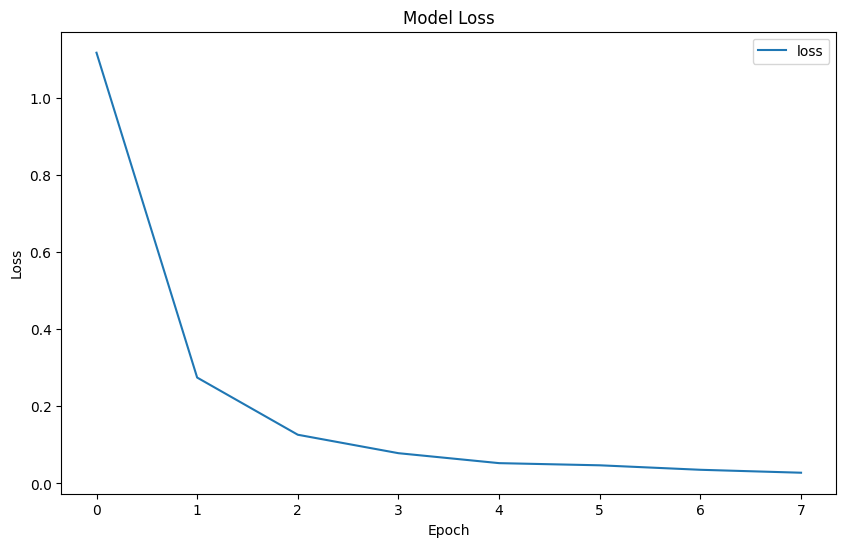

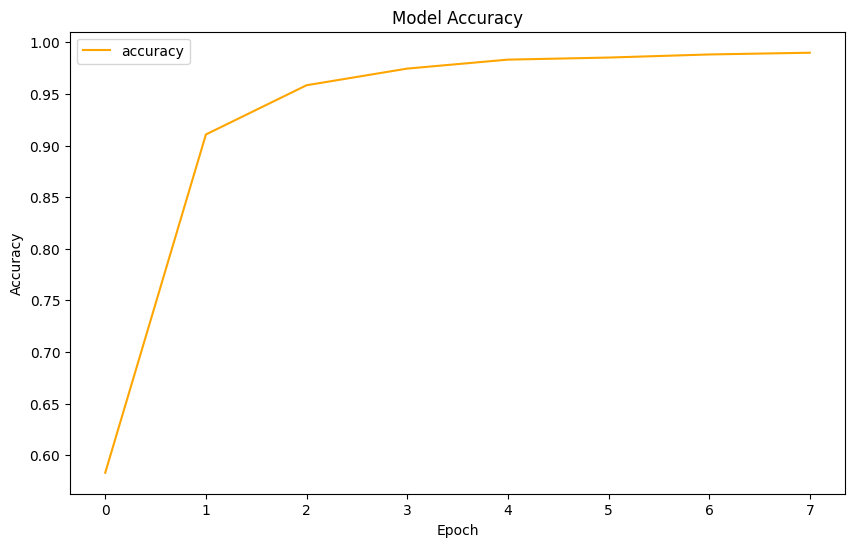

In [32]:
import pandas as pd

df_metrics = pd.DataFrame(history.history)
df_acc = df_metrics[['accuracy']]
df_loss = df_metrics[['loss']]
df_loss.plot(title='Model Loss',figsize=(10,6),xlabel='Epoch',ylabel='Loss')
df_acc.plot(title='Model Accuracy',figsize=(10,6),xlabel='Epoch',ylabel='Accuracy',color='orange')